# Modified Abeilan / Bak-Tang-Wiesenfeld Sandpile Simulation 
### Simulation Input 

** M * N ** Sandpile dimensions.  
** method ** Sand grain dropping method, either *random* or *center*.  
** threshold ** This variable will determine the critical state.   
** time ** How many times steps should the simulation run.
** show_input ** Set to true to see the sandpile at each step.

###  Simulation Output  

The simulation will output the sandpile, and a list of sandpile masses overtime.

Moreover, the simulation will calculate the following attributes of all avalanches:

( 1 ) **Size (s)** How many grains of sand are displaced in a single avalanche event

( 2 ) **Lifetime (l)** Number of timesteps it takes for an avalanche to relax the system to a critical state.

( 3 ) **Area (a)** Number of unique sites toppled in a given avalanche.

( 4 ) **Radius (r)** Maximum number of sites away from the initial site the avalanche reaches.  


### Topping Rules
**(1)** * z(i, j, t) = z(i, j, t) -  4*   
**(2)** * z(i ± 1, j, t) = z(i ± 1, j, t) + 1*  
**(3)** * z(i, j ± 1, t) = z(i, j ± 1, t) + 1*




## Running the Simulation

In [56]:
from BTW_sandpile import BTWsandpile
%reload_ext autoreload
%autoreload 2

### Change parameters here ###
M = 50                # pile length
N = 50                # pile width
time = 50000         # time of simulations
threshold = 4        # threshold of toppling condition 
show_step = False    # show sandpile by step
method = 'random'    # 'random' or 'center'


avalanche_mass, avalanche_size, avalanche_lifetime, avalanche_area, avalanche_radius, sandpile = BTWsandpile(M,N,show_step,time,threshold,method)


Progress: |██████████████████████████████████████████████████| 100.0% Complete
Sandpile simulation done.  50000  time steps elapsed,  50 * 50  pile size.          


## Exploring Sandpile & Avalanche Events 

In [83]:
from plots import plot_sandpile, plot_mass, plot_loglog, plot_pdf
%reload_ext autoreload
%autoreload 2

### Sandpile after Simulation

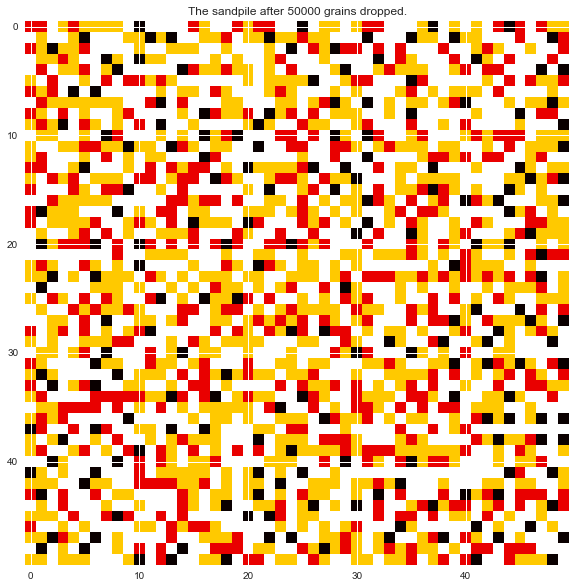

In [60]:
# plotting sandpile 
plot_sandpile(sandpile, time)

### Sandpile Masses accross Time

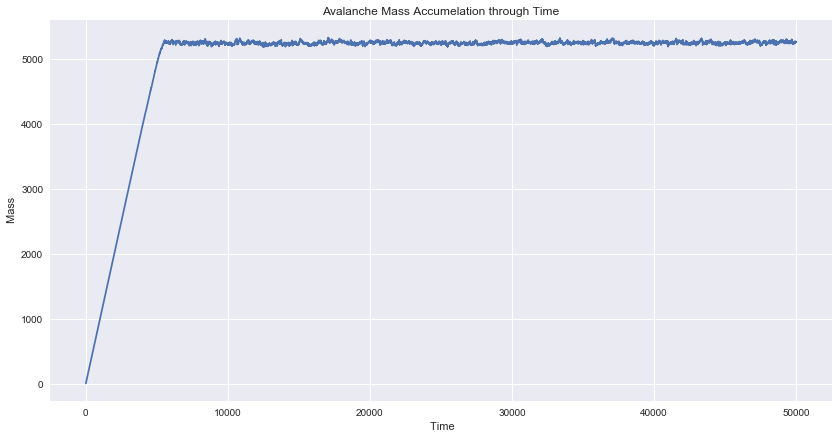

In [61]:
# plotting sandpile mass to determine cuttoff point (i.e. the point where the sandpile has been built)

plot_mass(avalanche_mass)

### Sandpile Build-Up 
Larger sandpile dimensions lead to longer times for the system to have avalanche events, therefore the build-up period has to be removed from the data. We determine the cutoff value by looking at the plot above.

In [67]:
cutoff = 1000

### Plot Log Log with a Power Law Fit for sand mass, and avalanche lifetime, size, radius, and area

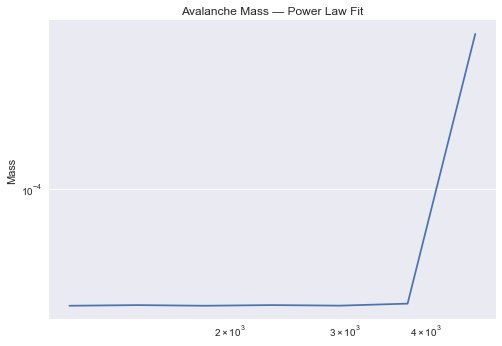

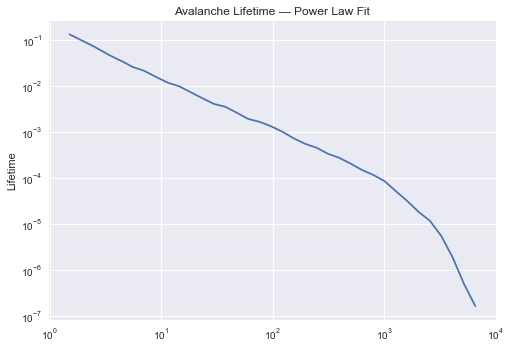

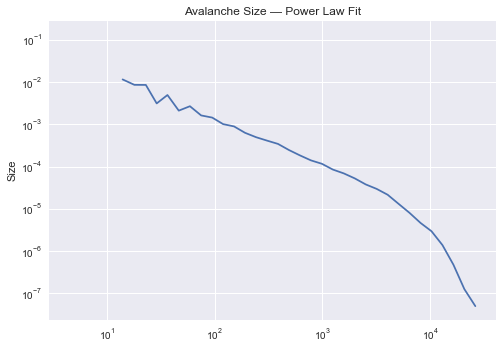

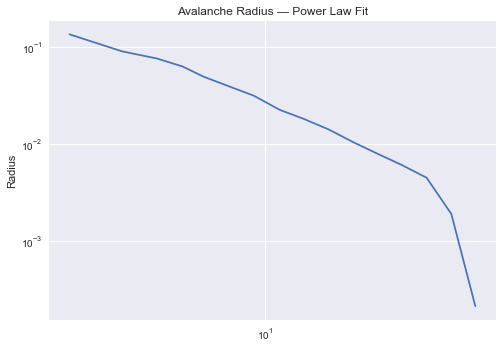

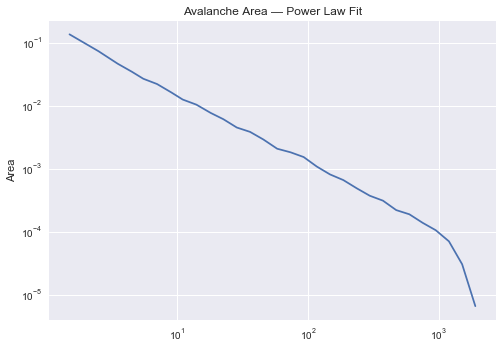

In [68]:
# removing useless data
avalanche_lifetime = list(filter(lambda x: x > 0, avalanche_lifetime))
avalanche_size = list(filter(lambda x: x > 0, avalanche_size))
avalanche_radius = list(filter(lambda x: x > 0, avalanche_radius))
avalanche_area = list(filter(lambda x: x > 0, avalanche_area))


plot_loglog(avalanche_mass[cutoff:], 'Mass')
plot_loglog(avalanche_lifetime, 'Lifetime')
plot_loglog(avalanche_size, 'Size')
plot_loglog(avalanche_radius, 'Radius')
plot_loglog(avalanche_area, 'Area')

### Sandpile Mass Trends and Power Law Behaviour

In [69]:
import powerlaw
pl = powerlaw.Fit(avalanche_area)
print(pl.alpha)

Calculating best minimal value for power law fit


16.8227538323


### Plot PDF for sand mass, and avalanche lifetime, size, radius, and area

/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


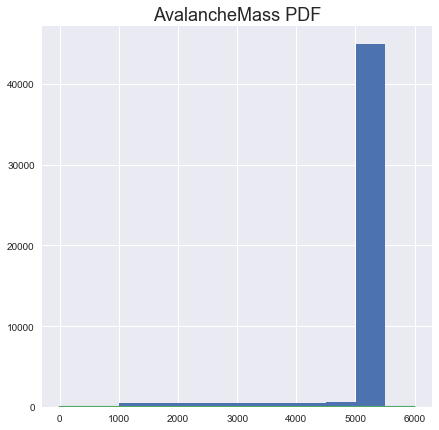

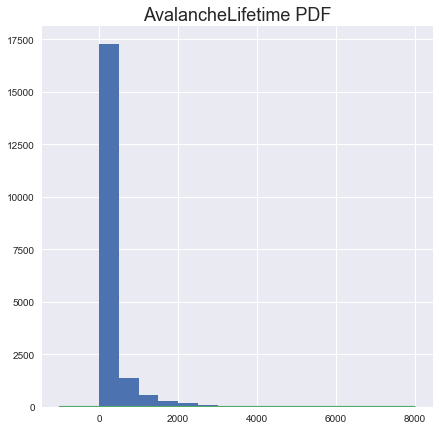

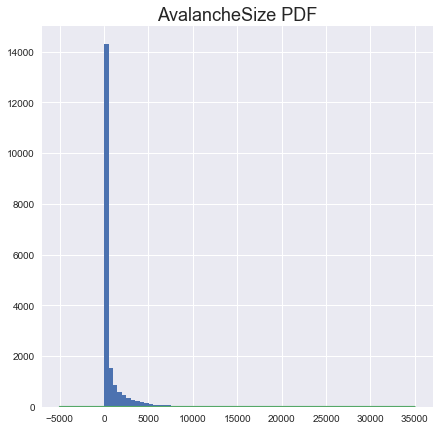

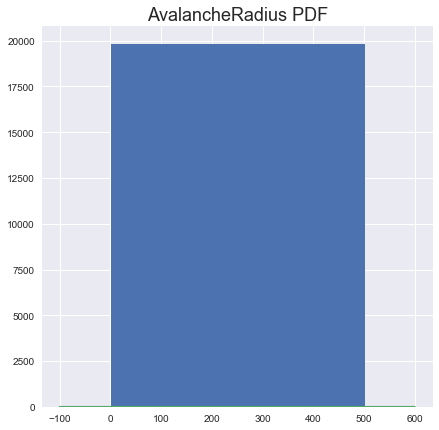

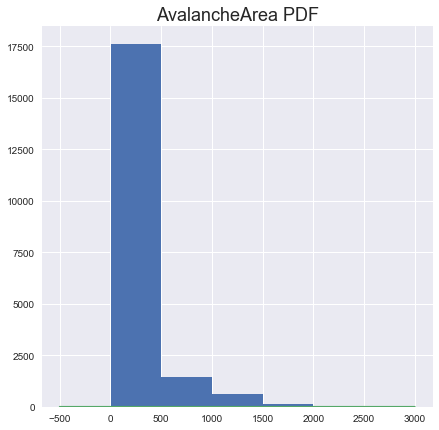

In [87]:
from plots import plot_sandpile, plot_mass, plot_loglog, plot_pdf
%reload_ext autoreload
%autoreload 2

plot_pdf(avalanche_mass[cutoff:], 'Mass')
plot_pdf(avalanche_lifetime, 'Lifetime')
plot_pdf(avalanche_size, 'Size')
plot_pdf(avalanche_radius, 'Radius')
plot_pdf(avalanche_area, 'Area')

/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


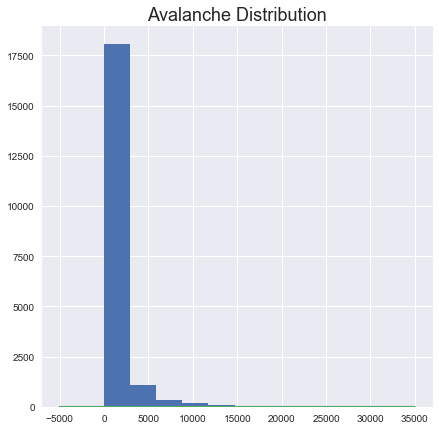

In [80]:

plot_distribution(avalanche_size)
